# Task 1

In [ ]:
from numpy import loadtxt
import numpy as np
from keras.models import Sequential, load_model
from keras.utils.vis_utils import plot_model
from keras.layers import Dense
from tensorflow.python.keras import Input
import tensorflow as tf
import pandas as pd

In [ ]:
df = pd.read_csv('balanced_bank_preprocessed.csv')

In [ ]:
X = df.iloc[:, :-1].values
y = df["y_cl"]
del df['id']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [ ]:
df

,age,job_cl,marital_cl,education_cl,default_cl,housing_cl,loan_cl,contact_cl,month_cl,day_of_week_cl,...,campaign,pdays,previous,poutcome_cl,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_cl
0,35,0,1,0,0,0,0,0,2,3,...,1,999,1,1,-1.8,92.893,-46.2,1.266,5099.1,0
1,42,2,0,3,0,1,0,1,2,1,...,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,1
2,36,0,0,0,0,1,0,0,5,0,...,2,999,0,0,1.4,93.444,-36.1,4.965,5228.1,1
3,37,0,0,1,0,0,1,1,4,2,...,2,999,0,0,1.4,93.918,-42.7,4.963,5228.1,1
4,31,4,1,0,0,0,0,0,1,3,...,1,999,0,0,-1.8,93.075,-47.1,1.365,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9275,45,1,0,5,0,0,0,0,1,3,...,1,999,1,1,-1.8,93.075,-47.1,1.410,5099.1,1
9276,60,0,0,0,0,0,0,0,2,0,...,2,999,0,0,-1.8,92.893,-46.2,1.354,5099.1,1
9277,38,1,0,2,0,0,0,0,1,4,...,1,999,1,1,-1.8,93.075,-47.1,1.405,5099.1,0
9278,41,2,1,0,0,1,0,0,4,3,...,2,999,0,0,1.4,93.918,-42.7,4.962,5228.1,0


In [ ]:
model = Sequential()
model.add(Dense(21, input_dim=21, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 21)                462       
                                                                 
 dense_1 (Dense)             (None, 1)                 22        
                                                                 
Total params: 484
Trainable params: 484
Non-trainable params: 0
_________________________________________________________________
None


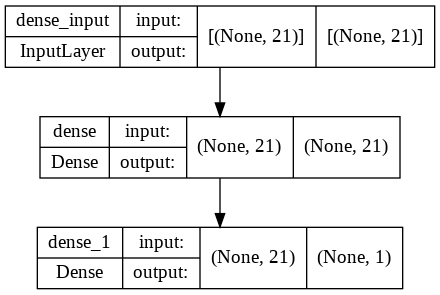

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# fit the keras model on the dataset
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
650/650 [==============================] - 5s 3ms/step - loss: 17.3792 - accuracy: 0.7805
Epoch 2/150
650/650 [==============================] - 2s 3ms/step - loss: 8.5499 - accuracy: 0.7822
Epoch 3/150
650/650 [==============================] - 2s 2ms/step - loss: 7.9807 - accuracy: 0.7751
Epoch 4/150
650/650 [==============================] - 2s 3ms/step - loss: 7.0138 - accuracy: 0.7742
Epoch 5/150
650/650 [==============================] - 2s 3ms/step - loss: 7.2776 - accuracy: 0.7763
Epoch 6/150
650/650 [==============================] - 3s 4ms/step - loss: 7.7018 - accuracy: 0.7799
Epoch 7/150
650/650 [==============================] - 3s 5ms/step - loss: 5.9369 - accuracy: 0.7819
Epoch 8/150
650/650 [==============================] - 3s 5ms/step - loss: 7.3702 - accuracy: 0.7694
Epoch 9/150
650/650 [==============================] - 3s 5ms/step - loss: 6.7578 - accuracy: 0.7783
Epoch 10/150
650/650 [==============================] - 2s 4ms/step - loss: 6.6140 - accur

In [ ]:
_, accuracy = model.evaluate(X_train, y_train)
print('Accuracy: %.2f' % (accuracy*100))

203/203 [==============================] - 1s 2ms/step - loss: 7.6333 - accuracy: 0.5930
Accuracy: 59.30


In [ ]:
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

87/87 [==============================] - 0s 2ms/step - loss: 7.2501 - accuracy: 0.6056
Accuracy: 60.56


In [ ]:
predictions = (model.predict(X) > 0.5).astype(int)
# summarize the first 5 cases
for i in range(5):
  print(X_train[i].tolist(), predictions[i], '=> (expected',y[i],')')

[3362.0, 36.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0, 294.0, 2.0, 999.0, 0.0, 0.0, 1.1, 93.994, -36.4, 4.86, 5191.0] [0] => (expected 0 )
[6515.0, 56.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 52.0, 2.0, 999.0, 0.0, 0.0, 1.1, 93.994, -36.4, 4.857, 5191.0] [0] => (expected 1 )
[30233.0, 46.0, 2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 369.0, 2.0, 999.0, 0.0, 0.0, -1.8, 93.075, -47.1, 1.365, 5099.1] [0] => (expected 1 )
[33418.0, 33.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 31.0, 4.0, 999.0, 0.0, 0.0, -1.8, 92.893, -46.2, 1.291, 5099.1] [0] => (expected 1 )
[20957.0, 30.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 5.0, 3.0, 165.0, 1.0, 999.0, 0.0, 0.0, 1.4, 93.444, -36.1, 4.964, 5228.1] [0] => (expected 0 )


In [ ]:
model.save('my_model')

INFO:tensorflow:Assets written to: my_model/assets


In [ ]:
from tensorflow import keras
reconstructed_model = keras.models.load_model("my_model")

In [ ]:
predictions = (reconstructed_model.predict(X) > 0.5).astype(int)
for i in range(5):
  print(X_train[i].tolist(), predictions[i], '=> (expected',y[i],')')

[3362.0, 36.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 1.0, 2.0, 3.0, 294.0, 2.0, 999.0, 0.0, 0.0, 1.1, 93.994, -36.4, 4.86, 5191.0] [0] => (expected 0 )
[6515.0, 56.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 1.0, 2.0, 2.0, 52.0, 2.0, 999.0, 0.0, 0.0, 1.1, 93.994, -36.4, 4.857, 5191.0] [0] => (expected 1 )
[30233.0, 46.0, 2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 369.0, 2.0, 999.0, 0.0, 0.0, -1.8, 93.075, -47.1, 1.365, 5099.1] [0] => (expected 1 )
[33418.0, 33.0, 1.0, 0.0, 2.0, 0.0, 0.0, 1.0, 0.0, 2.0, 1.0, 31.0, 4.0, 999.0, 0.0, 0.0, -1.8, 92.893, -46.2, 1.291, 5099.1] [0] => (expected 1 )
[20957.0, 30.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 5.0, 3.0, 165.0, 1.0, 999.0, 0.0, 0.0, 1.4, 93.444, -36.1, 4.964, 5228.1] [0] => (expected 0 )


# Task 2

https://www.tensorflow.org/tutorials/images/classification

In [ ]:
import numpy as np

import keras
from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense
from keras.models import Model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import random


In [ ]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1319 sha256=e41c6f35509a96a4d6c2891c26e656a766e9dafac7db259abbc6cda456750e7b
  Stored in directory: /root/.cache/pip/wheels/c5/05/b3/f7b36dbaaf76de31b718cde792c953bfd11d2414a72f204b56
Successfully built unzip


In [ ]:
!unzip CatsVsDogs.zip #распаковываем архив

Archive:  CatsVsDogs.zip
   creating: Cats_vs_Dogs/
  inflating: Cats_vs_Dogs/CDLA-Permissive-2.0.pdf  
   creating: Cats_vs_Dogs/PetImages/
   creating: Cats_vs_Dogs/PetImages/Cat/
  inflating: Cats_vs_Dogs/PetImages/Cat/0.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/1.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/10.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/100.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/101.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/102.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/103.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/104.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/105.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/106.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/107.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/108.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/109.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/11.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/110.jpg  
  inflating: Cats_vs_Dogs/PetImages/Cat/111.jpg  
  inflating: Cats_vs_Dog

In [ ]:
!ls PetImages

Cat  Dog


In [ ]:
import os

num_skipped = 0
for folder_name in ("Cat", "Dog"):
    folder_path = os.path.join("PetImages", folder_name)
    for fname in os.listdir(folder_path):
        fpath = os.path.join(folder_path, fname)
        try:
            fobj = open(fpath, "rb")
            is_jfif = tf.compat.as_bytes("JFIF") in fobj.peek(10)
        finally:
            fobj.close()

        if not is_jfif:
            num_skipped += 1
            # Delete corrupted image
            os.remove(fpath)

print("Deleted %d images" % num_skipped)

Deleted 65 images


In [ ]:
image_size = (64, 64)
batch_size = 64

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="training",
    seed=1450,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "PetImages",
    validation_split=0.2,
    subset="validation",
    seed=1450,
    image_size=image_size,
    batch_size=batch_size,
)

Found 937 files belonging to 2 classes.
Using 750 files for training.
Found 937 files belonging to 2 classes.
Using 187 files for validation.


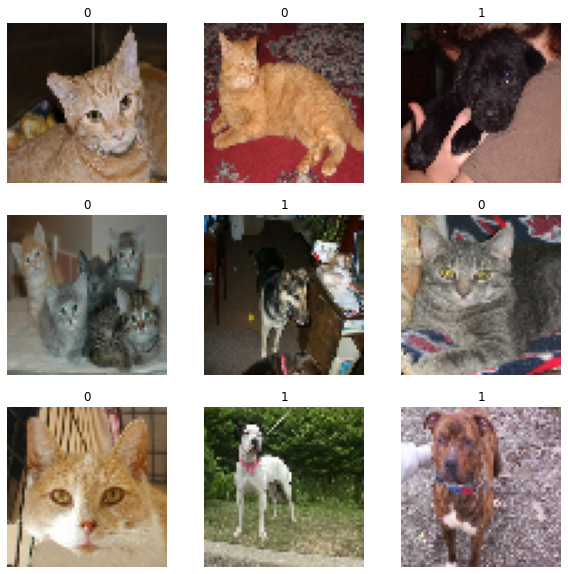

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(int(labels[i]))
        plt.axis("off")

In [ ]:
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"),
        layers.RandomRotation(0.1),
    ]
)

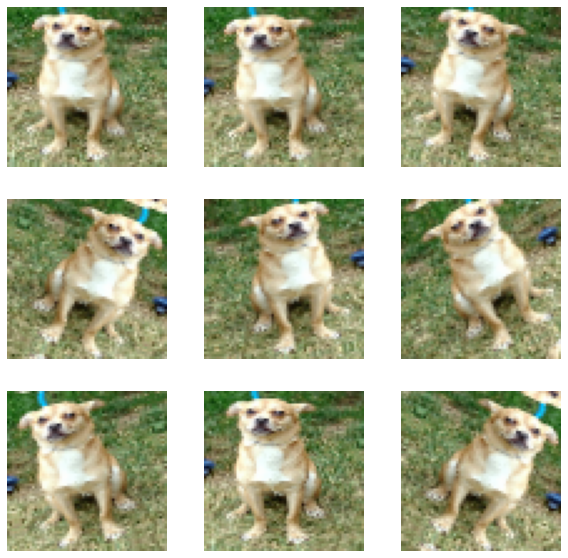

In [ ]:
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [ ]:
train_ds = train_ds.prefetch(buffer_size=32)
val_ds = val_ds.prefetch(buffer_size=32)

In [ ]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [128]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("sigmoid")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        #x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("sigmoid")(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units = 1, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

In [ ]:
model = make_model(input_shape=image_size + (3,), num_classes=2)

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds
)

Epoch 1/25
12/12 [==============================] - 13s 163ms/step - loss: 0.8041 - accuracy: 0.5120 - val_loss: 0.6998 - val_accuracy: 0.4973
Epoch 2/25
12/12 [==============================] - 1s 69ms/step - loss: 0.6731 - accuracy: 0.6093 - val_loss: 0.6939 - val_accuracy: 0.5027
Epoch 3/25
12/12 [==============================] - 1s 65ms/step - loss: 0.6950 - accuracy: 0.6200 - val_loss: 0.6962 - val_accuracy: 0.4973
Epoch 4/25
12/12 [==============================] - 1s 66ms/step - loss: 0.6940 - accuracy: 0.6027 - val_loss: 0.6933 - val_accuracy: 0.4973
Epoch 5/25
12/12 [==============================] - 2s 120ms/step - loss: 0.6685 - accuracy: 0.6080 - val_loss: 0.6936 - val_accuracy: 0.4973
Epoch 6/25
12/12 [==============================] - 2s 107ms/step - loss: 0.6670 - accuracy: 0.6267 - val_loss: 0.6980 - val_accuracy: 0.5027
Epoch 7/25
12/12 [==============================] - 1s 66ms/step - loss: 0.6662 - accuracy: 0.6240 - val_loss: 0.6960 - val_accuracy: 0.4973
Epoch 8/2

In [ ]:
img = keras.preprocessing.image.load_img(
    "PetImages/Cat/500.jpg", target_size=image_size
)
img_array = keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Create batch axis

predictions = model.predict(img_array)
print(predictions)
score = predictions[0]
print(
    "%.2f процентов - кошка и с %.2f процентов - собака."
    % (100 * (1 - score), 100 * score)
)

[[0.29410377]]
70.59 процентов - кошка и с 29.41 процентов - собака.
